In [1]:
%load_ext autoreload

In [6]:
from ML.data_utils import get_delta_pot_class, dpot_class_metrics
from ML.ml_utils_reg import create_directory
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ML.ml_utils_reg import plot_regression_models_cat
sns.set_theme(style="whitegrid")
%autoreload 2

# Load dataset

In [3]:
db_path = "./dataset/"
df_regression = pd.read_csv(db_path + "chembl_33_pIC50.csv")
df_regression

,smiles,standard_type,pPot,cid,tid
0,Brc1cc2c(NCc3ccccc3)ncnc2s1,IC50,6.617983,CHEMBL3416599,203
1,Brc1cc2c(NCc3ccccn3)ncnc2s1,IC50,5.102153,CHEMBL3416616,203
2,Brc1cc2c(NCc3cccs3)ncnc2s1,IC50,5.862013,CHEMBL3416619,203
3,Brc1cc2c(NCc3ccncc3)ncnc2s1,IC50,5.410833,CHEMBL3416614,203
4,Brc1cc2c(Nc3ccccc3)ncnc2s1,IC50,7.096910,CHEMBL3416621,203
...,...,...,...,...,...
16524,c1csc(-c2n[nH]c3c2Cc2ccccc2-3)c1,IC50,6.031517,CHEMBL212899,279
16525,c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)c...,IC50,6.575118,CHEMBL3582232,220
16526,c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)c...,IC50,6.490797,CHEMBL3582223,220
16527,c1ncc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)c...,IC50,6.304518,CHEMBL3582224,220


# Load MMP dataset

In [4]:
mmp_path = "./ccrlib_master/"
df_mmp = pd.read_csv(mmp_path + "df_mmp_final_top10.csv")
df_mmp

,core,as,sub_1,cid_1,sub_2,cid_2,tid,mmp_id,dpot,similarity,mmp_trial
0,COc1cc(Nc2ncnc3cc([*:1])sc23)cc(OC)c1OC,253,c1ccc([*:1])cc1,CHEMBL4541014,Brc1ccc([*:1])cc1,CHEMBL4572443,203,0,1.151490,0.800000,0
1,COc1cc(Nc2ncnc3cc([*:1])sc23)cc(OC)c1OC,253,Ic1ccc([*:1])cc1,CHEMBL4473768,COc1ccc([*:1])cc1,CHEMBL4546122,203,1,0.716003,0.820000,0
2,COc1cc(Nc2ncnc3cc([*:1])sc23)cc(OC)c1OC,253,c1csc([*:1])c1,CHEMBL4460381,Clc1ccc([*:1])cc1,CHEMBL4552482,203,2,2.038223,0.685185,0
3,COc1cc2ncnc(N3CCCc4ccccc43)c2cc1NC(=O)C=CC[*:1],135,CN(C)[*:1],CHEMBL4176787,CC[*:1],CHEMBL4162530,203,3,0.338819,0.814286,0
4,Clc1cc(Nc2ncnc3cccc(O[*:1])c23)ccc1OCc1ccccn1,207,C[*:1],CHEMBL194389,C1CC([*:1])CCO1,CHEMBL193578,203,4,0.736759,0.718750,0
...,...,...,...,...,...,...,...,...,...,...,...
45337,O=c1cc(-c2[nH]c([*:1])nc2-c2ccc(F)cc2)cc[nH]1,3,O=C(O)c1ccc([*:1])cc1,CHEMBL3313935,C#Cc1ccc([*:1])cc1,CHEMBL3314276,260,475,0.504318,0.692308,9
45338,Nc1ccccc1Nc1ccc2c(c1)CCc1ccc(O[*:1])cc1C2=O,73,OCC(O)C[*:1],CHEMBL2152936_CHEMBL2152938,C[*:1],CHEMBL2152777,260,476,1.364568,0.677966,9
45339,O=C1NCc2c(-c3ccccc3Cl)nc(O[*:1])nc2N1c1c(Cl)cc...,144,CN(C)CC[*:1],CHEMBL211426,[*:1],CHEMBL213846,260,477,0.021189,0.616667,9
45340,O=C1c2ccc(Nc3ccccc3)cc2CCc2ccc(O[*:1])cc21,200,C[*:1],CHEMBL2152784,[*:1],CHEMBL2152796,260,478,0.162727,0.673913,9


# Performance

In [5]:
df_mmp = pd.read_csv('regression_mmp/ECFP4/regression/performance_test.csv')
df_mmp

,Target ID,Algorithm,Dataset size,Metric,Value,trial,Approach,Fingerprint,Split,mm_trial
0,203,1-NN,431,MAE,0.633557,0,regression,ECFP4,Random,0
1,203,1-NN,431,MSE,0.773693,0,regression,ECFP4,Random,0
2,203,1-NN,431,R2,0.513639,0,regression,ECFP4,Random,0
3,203,1-NN,431,RMSE,0.879598,0,regression,ECFP4,Random,0
4,203,1-NN,431,r,0.750033,0,regression,ECFP4,Random,0
...,...,...,...,...,...,...,...,...,...,...
47995,260,RFR,480,r,0.835794,9,regression,ECFP4,Stratified,9
47996,260,MR,480,MAE,0.865473,9,regression,ECFP4,Stratified,9
47997,260,MR,480,MSE,1.130249,9,regression,ECFP4,Stratified,9
47998,260,MR,480,R2,-0.001125,9,regression,ECFP4,Stratified,9


# Fig 3

Created new directory './figures/'


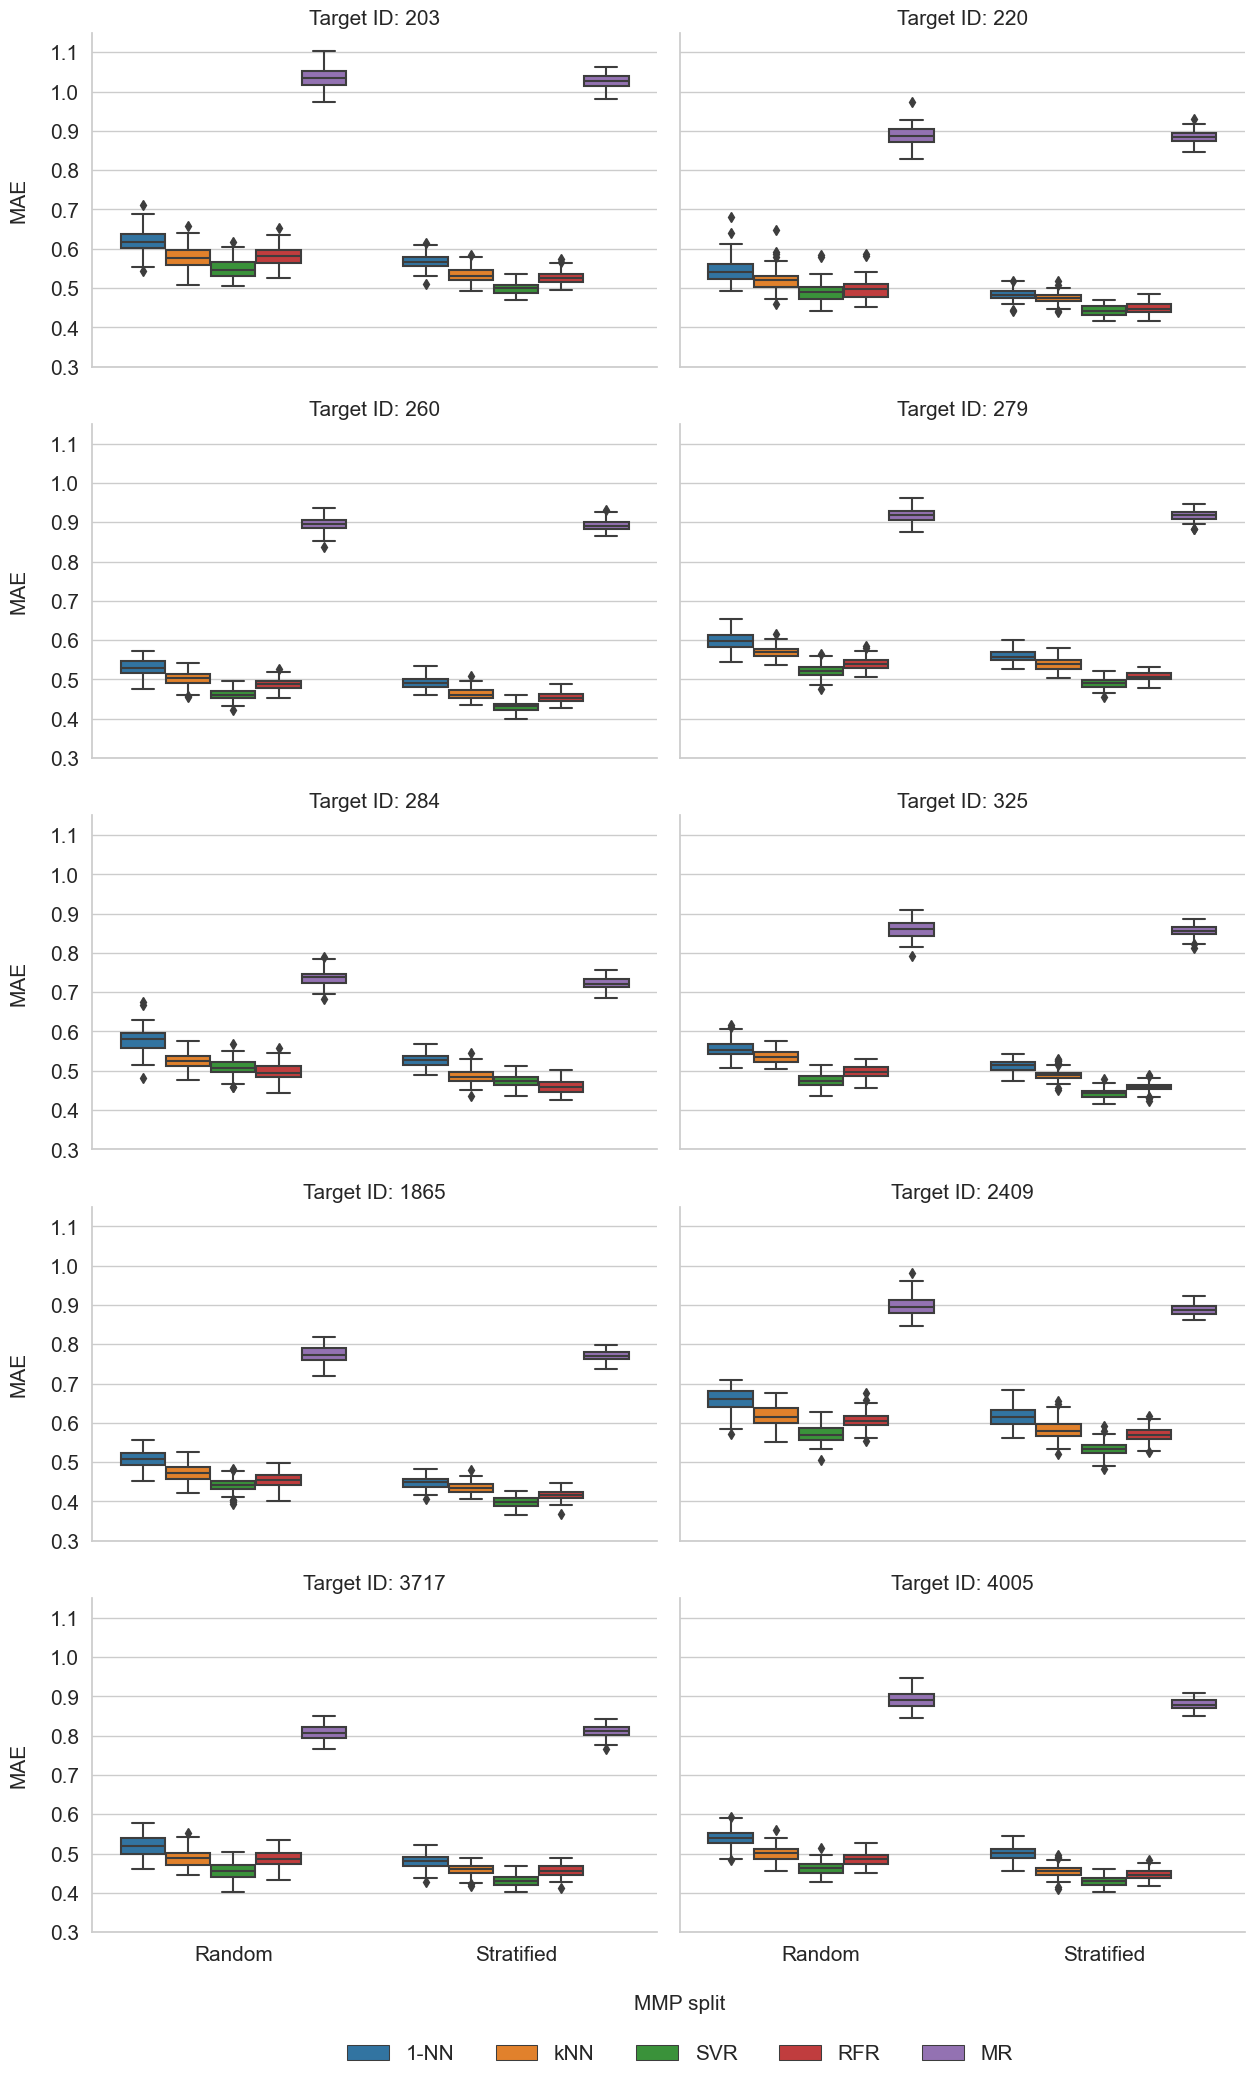

In [7]:
plot_regression_models_cat(df_mmp, metric=['MAE'], x="Split", y="Value", hue="Algorithm", height=4, aspect=1.6, col="Target ID", 
                           hue_order=['1-NN', 'kNN', 'SVR', 'RFR', 'MR'], font_size=15, 
                           yticks=[0.3,0.4, 0.5, 0.6,0.7,0.8,0.9,1, 1.1], ymin=0.3, ymax=1.15,
                           bbox_to_anchor=(-0.0, -0.45), legend_title= "MMP split",
                            y_labels='MAE',col_wrap=2, order=['Random', 'Stratified',],
                           results_path=create_directory('./figures/'), filename='Fig3'
                           )

# Fig 4

In [ ]:
metric_df_random = df_mmp.query('Metric== "MAE" and Split == "Random"')
metric_df_random = metric_df_random.groupby(['Target ID', 'Split', 'Algorithm' ]).Value.agg(['median']).reset_index()
metric_df_random.rename(columns={'median':'Random (median MAE)'}, inplace=True)
metric_df_stratified = df_mmp.query('Metric== "MAE" and Split == "Stratified"')
metric_df_stratified = metric_df_stratified.groupby(['Target ID', 'Split', 'Algorithm' ]).Value.agg(['median']).reset_index()
metric_df_stratified.rename(columns={'median':'Stratified (median MAE)'}, inplace=True)
metric_df = pd.merge(metric_df_random, metric_df_stratified, on=['Target ID', 'Algorithm'])
metric_df

In [ ]:
import matplotlib
font = {'size': 20}
matplotlib.rc('font', **font)
width = 10
height = 7
sns.set(rc = {'figure.figsize':(width, height)}, font_scale=1.5, style="whitegrid")
g = sns.scatterplot(data=metric_df.query('Algorithm != "MR"'), y="Random (median MAE)", x="Stratified (median MAE)", palette="tab10", hue="Algorithm", style= "Target ID", hue_order=['1-NN', 'kNN', 'SVR', 'RFR'], s=100)
g.set(xlim=(0.37, 0.7), ylim=(0.37, 0.7))
legend = plt.legend(bbox_to_anchor=(1.3, 1), ncol=1,
                    frameon=True)
strat = 'Stratified'
plt.title('Stratified versus random sampling', pad=15)
g.set_xlabel(f'Stratified (median MAE)', labelpad=15)
g.set_ylabel('Random (median MAE)', labelpad=15)
plt.savefig('./figures/Fig4.png', dpi=150, bbox_inches="tight")

# Load Test Predictions

In [8]:
df_mmp_multiple = pd.read_csv('regression_mmp/ECFP4/regression/predictions_test.csv')
display(df_mmp_multiple)

,Unnamed: 0,cid,Experimental,Predicted,smiles,mmp_id,analog_series_id,train_test,Target ID,Algorithm,Residuals,similarity,dPot,1-NN,1-NN_smiles,trial,Approach,Fingerprint,Split,mm_trial
0,0,CHEMBL3774926,6.856985,6.674895,C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(CCCN2CCOCC2)C(=O...,273,24,test,203,1-NN,0.182090,0.871429,0.182090,NaN,NaN,0,regression,ECFP4,Random,0
1,1,CHEMBL2334001,7.197911,7.917215,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCO,9,278,test,203,1-NN,-0.719304,0.630769,0.802089,NaN,NaN,0,regression,ECFP4,Random,0
2,2,CHEMBL4546122,7.283997,6.563837,COc1ccc(-c2cc3ncnc(Nc4cc(OC)c(OC)c(OC)c4)c3s2)cc1,1,253,test,203,1-NN,0.720159,0.820000,0.716003,NaN,NaN,0,regression,ECFP4,Random,0
3,3,CHEMBL453378,8.819874,9.160019,CCOC(=O)C=CC(=O)Cc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,202,143,test,203,1-NN,-0.340145,0.589744,0.270142,NaN,NaN,0,regression,ECFP4,Random,0
4,4,CHEMBL3622675,8.619789,8.481486,C#Cc1cccc(Nc2ncnc3cc(OCC)c(NC(=O)C=CCN(C)C4CC4...,325,10,test,203,1-NN,0.138303,0.890411,0.138303,NaN,NaN,0,regression,ECFP4,Random,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534195,475,CHEMBL203770,5.896196,7.475004,Nc1c(C(=O)c2cccc(OCCN3CCOCC3)c2)cnn1-c1ccc(F)cc1,294,301,test,260,MR,-1.578807,0.632353,0.141664,NaN,NaN,9,regression,ECFP4,Stratified,9
4534196,476,CHEMBL5071182,7.744727,7.475004,Nc1ccccc1Nc1ccc2c(c1)CCc1ccc(C(=O)NCCN3CCNCC3)...,314,141,test,260,MR,0.269724,0.578947,0.176091,NaN,NaN,9,regression,ECFP4,Stratified,9
4534197,477,CHEMBL94495,8.155026,7.475004,COC(=O)c1cc(-c2ccccc2F)c2c(c1)N(c1c(Cl)cccc1Cl...,161,170,test,260,MR,0.680022,0.698413,1.269036,NaN,NaN,9,regression,ECFP4,Stratified,9
4534198,478,CHEMBL379929,8.017729,7.475004,CC(C)c1nnc2ccc(-c3ocnc3-c3ccccc3)cn12,253,66,test,260,MR,0.542725,0.755102,0.595221,NaN,NaN,9,regression,ECFP4,Stratified,9


In [10]:
print(max(df_mmp_multiple.dPot.values))

4.3979400086720375


# Delta potency class

In [48]:
from tqdm import tqdm
tqdm.pandas()
df_m = df_mmp_multiple.copy()
df_m['dpot_class'] = df_m.dPot.progress_apply(lambda x: get_delta_pot_class(x, min_pot=0,max_dpot=5))

100%|██████████| 4534200/4534200 [00:23<00:00, 193223.99it/s]


# Generate MMP delta potency metrics (takes a while to run) - only run if you want to generate the metrics

In [49]:
df_dpot_metrics_m = dpot_class_metrics(df_m)
display(df_dpot_metrics_m)

100%|██████████| 90000/90000 [11:33:00<00:00,  2.16it/s]  


Value,Target ID,Algorithm,Test size,mm trial,Trial,Split,dPot,Metric,Value
0,203,1-NN,246,0,0,Random,"(0.0, 0.5]",Average similarity,0.758363
1,203,1-NN,246,0,0,Random,"(0.0, 0.5]",MAE,0.467527
2,203,1-NN,246,0,0,Random,"(0.0, 0.5]",MSE,0.432414
3,203,1-NN,246,0,0,Random,"(0.0, 0.5]",RMSE,0.657582
4,203,1-NN,98,0,0,Random,"(0.5, 1.0]",Average similarity,0.716513
...,...,...,...,...,...,...,...,...,...
271575,260,MR,9,9,9,Stratified,"(2.0, 2.5]",RMSE,1.278497
271576,260,MR,1,9,9,Stratified,"(2.5, 3.0]",Average similarity,0.636364
271577,260,MR,1,9,9,Stratified,"(2.5, 3.0]",MAE,1.541702
271578,260,MR,1,9,9,Stratified,"(2.5, 3.0]",MSE,2.376845


In [50]:
df_dpot_metrics_m.to_csv('./regression_mmp/ECFP4/regression/dpot_metrics_rs.csv', index=False)

# Load MMP delta metrics

In [8]:
df_dpot_metrics_multiple_load = pd.read_csv('regression_mmp/ECFP4/regression/dpot_metrics_rs.csv')
df_dpot_metrics_multiple_load

,Target ID,Algorithm,Test size,mm trial,Trial,Split,dPot,Metric,Value
0,203,1-NN,246,0,0,Random,"(0.0, 0.5]",Average similarity,0.758363
1,203,1-NN,246,0,0,Random,"(0.0, 0.5]",MAE,0.467527
2,203,1-NN,246,0,0,Random,"(0.0, 0.5]",MSE,0.432414
3,203,1-NN,246,0,0,Random,"(0.0, 0.5]",RMSE,0.657582
4,203,1-NN,98,0,0,Random,"(0.5, 1.0]",Average similarity,0.716513
...,...,...,...,...,...,...,...,...,...
271575,260,MR,9,9,9,Stratified,"(2.0, 2.5]",RMSE,1.278497
271576,260,MR,1,9,9,Stratified,"(2.5, 3.0]",Average similarity,0.636364
271577,260,MR,1,9,9,Stratified,"(2.5, 3.0]",MAE,1.541702
271578,260,MR,1,9,9,Stratified,"(2.5, 3.0]",MSE,2.376845


In [9]:
df_dpot_metrics_multiple_load['dPot'] = df_dpot_metrics_multiple_load['dPot'].replace({'(0.0, 0.5]':'[0, 0.5]','(0.5, 1.0]':'(0.5, 1]',     '(1.0, 1.5]':'(1, 1.5]',
                                                                                       '(1.5, 2.0]':'(1.5, 2]','(2.0, 2.5]':'(2, 2.5]','(2.5, 3.0]':'(2.5, 3]',
                                                                                       '(3.0, 3.5]':'(3, 3.5]','(3.5, 4.0]':'(3.5, 4]','(4.0, 4.5]':'(4, 4.5]'})
df_dpot_metrics_multiple_load

,Target ID,Algorithm,Test size,mm trial,Trial,Split,dPot,Metric,Value
0,203,1-NN,246,0,0,Random,"[0, 0.5]",Average similarity,0.758363
1,203,1-NN,246,0,0,Random,"[0, 0.5]",MAE,0.467527
2,203,1-NN,246,0,0,Random,"[0, 0.5]",MSE,0.432414
3,203,1-NN,246,0,0,Random,"[0, 0.5]",RMSE,0.657582
4,203,1-NN,98,0,0,Random,"(0.5, 1]",Average similarity,0.716513
...,...,...,...,...,...,...,...,...,...
271575,260,MR,9,9,9,Stratified,"(2, 2.5]",RMSE,1.278497
271576,260,MR,1,9,9,Stratified,"(2.5, 3]",Average similarity,0.636364
271577,260,MR,1,9,9,Stratified,"(2.5, 3]",MAE,1.541702
271578,260,MR,1,9,9,Stratified,"(2.5, 3]",MSE,2.376845


# Fig 6 parameters

In [ ]:
metric = 'MAE'
df_plot = df_dpot_metrics_multiple_load.copy()
tids = sorted(df_plot['Target ID'].unique().tolist())
print(tids)

# Fig 6 a

In [ ]:

g = plot_regression_models_cat(df_plot.loc[df_plot['Target ID'].isin(tids[:5])], [metric], x="dPot", y="Value",hue="Algorithm", height=6, aspect=2, hue_order=['1-NN', 'kNN', 'SVR', 'RFR', 'MR'], font_size=20, 
                           order=['[0, 0.5]','(0.5, 1]', '(1, 1.5]','(1.5, 2]','(2, 2.5]','(2.5, 3]','(3, 3.5]','(3.5, 4]','(4, 4.5]',], 
                            yticks=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                           bbox_to_anchor=(-0.0, -0.4), #(-0.01, -0.35) #(-1.12, -0.35)
                            y_labels=metric,
                            legend_title='MMP \u0394 potency',
                           col="Split", 
                           row="Target ID",
                           sharey=True,
                            fig='fig4',
                            sub_fig_title='a',
                           results_path='./figures/', filename=f'Fig6a',
                           )

# Fig 6 b

In [ ]:

g = plot_regression_models_cat(df_plot.loc[df_plot['Target ID'].isin(tids[5:])], [metric], x="dPot", y="Value",hue="Algorithm", height=6, aspect=2, hue_order=['1-NN', 'kNN', 'SVR', 'RFR', 'MR'], font_size=20,
                               order=['[0, 0.5]','(0.5, 1]', '(1, 1.5]','(1.5, 2]','(2, 2.5]','(2.5, 3]','(3, 3.5]','(3.5, 4]','(4, 4.5]',],
                               yticks=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                               bbox_to_anchor=(-0.0, -0.4), #(-0.01, -0.35) #(-1.12, -0.35)
                               y_labels=metric,
                               legend_title='MMP \u0394 potency',
                               col="Split",
                               row="Target ID",
                               sharey=True,
                               fig='fig4',
                               sub_fig_title='b',
                               results_path='./figures/', filename=f'Fig6b',
                               )

# FIG 5 (Test size distributions)

In [ ]:
import matplotlib

# plt parameters
font_size = 22
font = {'size': font_size}
matplotlib.rc('font', **font)
sns.set_style("whitegrid", {'axes.grid' : False})

g = plot_regression_models_cat(df=df_dpot_metrics_multiple_load.query('Algorithm == "SVR"'), metric=['MAE'], 
                               x="dPot", y= "Test size", hue="Split", col="Target ID", col_wrap=2, height=6, aspect=2,                                                                            
                               sharey=True, plot_type='barplot',
                               order=['[0, 0.5]','(0.5, 1]', '(1, 1.5]','(1.5, 2]','(2, 2.5]','(2.5, 3]','(3, 3.5]','(3.5, 4]','(4, 4.5]',],
                               hue_order=['Random','Stratified'], palette="Paired",
                               bbox_to_anchor=(-0.0, -0.45), 
                               y_labels='Test set size', legend_title= "MMP \u0394 potency", font_size=font_size, x_labels=''
                               )

g.fig.subplots_adjust(top=0.9)

# iterate through axes
for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        labels = ['0' if x == 'nan' else x for x in [f'{(v.get_height()):.0f}' for v in c]]
        plt.rcParams['font.size'] = font_size-5
        ax.bar_label(c, labels=labels, label_type='edge', padding=3)
    ax.margins(y=0.2)
    
plt.savefig('./figures/' + 'Fig5.png', dpi=300, bbox_inches="tight")
plt.show()